In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
key = os.environ.get('AZURE_SEARCH_KEY','929f2ef6945c449c89f4d3dbb7c0cb77')

In [13]:
## assigning types you can to diff

lion_types = 'congo', 'asiatic', 'white'
path = Path('Lions')

In [20]:
## creating the dir and downloading the images

### search_images_bing is a fast ai func which takes in the api key
### and the search keyword and returns search resutls which contains the urls

### download_images is the fast ai function to download the images inthe destation folders

if not path.exists():
    path.mkdir()
    for lion in lion_types:
        dest = (path/lion)
        dest.mkdir(exist_ok = True)
        results = search_images_bing(key, f'{lion} lion')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [21]:
# image path obj

fns = get_image_files(path)


In [22]:
## deleting broken images

failed = verify_images(fns)

failed.map(Path.unlink)

(#2) [None,None]

In [23]:
## Data to dataloaders

## creating a lion data loader, which uses the images downloaded and creates
## valid train and test sets


lions= DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items= get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [24]:
## dataloader obj

dls = lions.dataloaders(path)

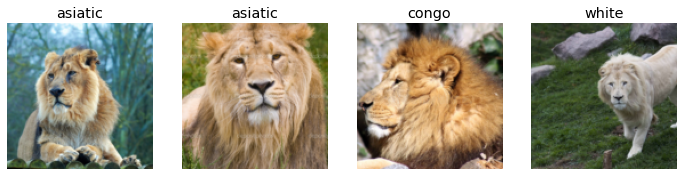

In [25]:
dls.valid.show_batch(max_n=4, nrows=1)

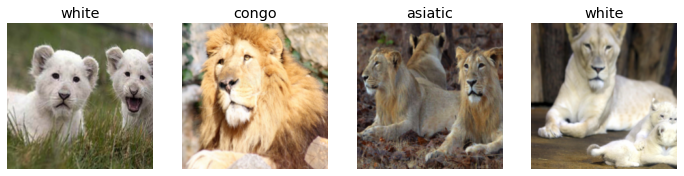

In [30]:
## data augmentation

lions = lions.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = lions.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1)

In [27]:
# training with fine

learn = cnn_learner(dls,resnet18, metrics=error_rate)
learn.fine_tune(4)

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.857561,0.805903,0.287356,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.921826,0.738964,0.229885,00:10
1,0.853834,0.867995,0.241379,00:09
2,0.732383,0.818062,0.229885,00:09
3,0.633106,0.790147,0.195402,00:09


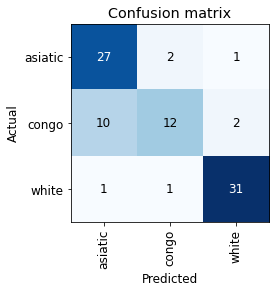

In [28]:
interp= ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()